## Bike Sharing Analysis

A model for the prediction of demand for shared bikes

Problem Statement

In [154]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



import warnings
warnings.filterwarnings('ignore')

In [21]:
bikedata = pd.read_csv('day.csv')
bikedata.shape

(730, 16)

In [22]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data Cleaning

In [23]:
#check the information about the columns

bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [24]:
#Check if there are any null rows  in data

bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [64]:
#keep a copy of the original dataframe

df = bikedata.copy()

In [65]:
#since the columns casual, registered, instant are not needed
columns_not_needed = ['casual','registered','instant','dteday']
df.drop(columns_not_needed,axis=1,inplace=True)
df.shape

(730, 12)

In [66]:
#encoding the season column to make it categorical
df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [67]:
#encoding the weathersit column to make it categorical
df['weathersit'] = df['weathersit'].map({1:'clear',2:'misty',3:'light rain',4:'heavy rain'})

In [68]:
#rename the columns for better readability
df.rename(columns={'weathersit':'weather_type','yr':'year','mnth':'month','atemp':'temp_feel','hum':'humidity','cnt':'count'},inplace=True)

In [69]:
#change the weekdays from numbers to make it categorical
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [70]:
#change the months from numbers to make it categorical
df['month'] = df['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [71]:
#change the year from numbers based on the info provided in problem statement
df['year'] = df['year'].map({0:'2018',1:'2019'})

In [74]:
#check the info now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    object 
 1   year          730 non-null    object 
 2   month         730 non-null    object 
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    object 
 5   workingday    730 non-null    int64  
 6   weather_type  730 non-null    object 
 7   temp          730 non-null    float64
 8   temp_feel     730 non-null    float64
 9   humidity      730 non-null    float64
 10  windspeed     730 non-null    float64
 11  count         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


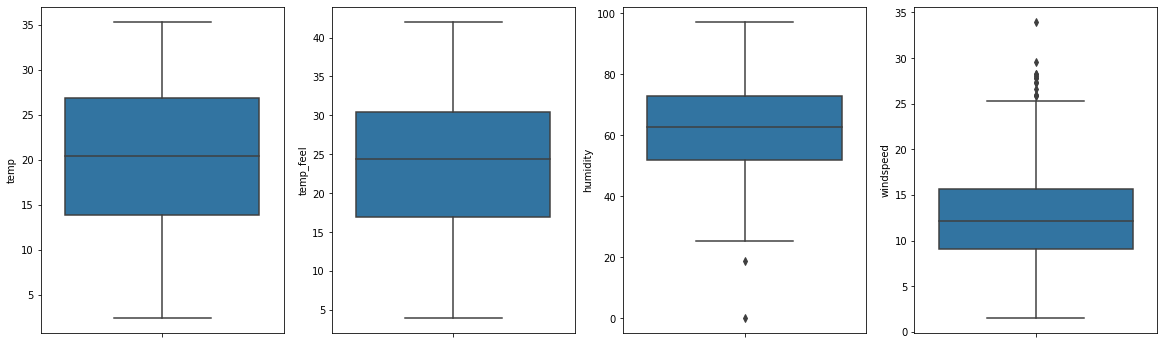

In [95]:
#check for any outliers in the numerical fields

num_cols = ['temp', 'temp_feel', 'humidity', 'windspeed']

i=1
plt.figure(figsize=(20,6))
for col in num_cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data=df)
    i+=1
plt.show()

In [139]:
#we can confirm that there are no outliers in the values.

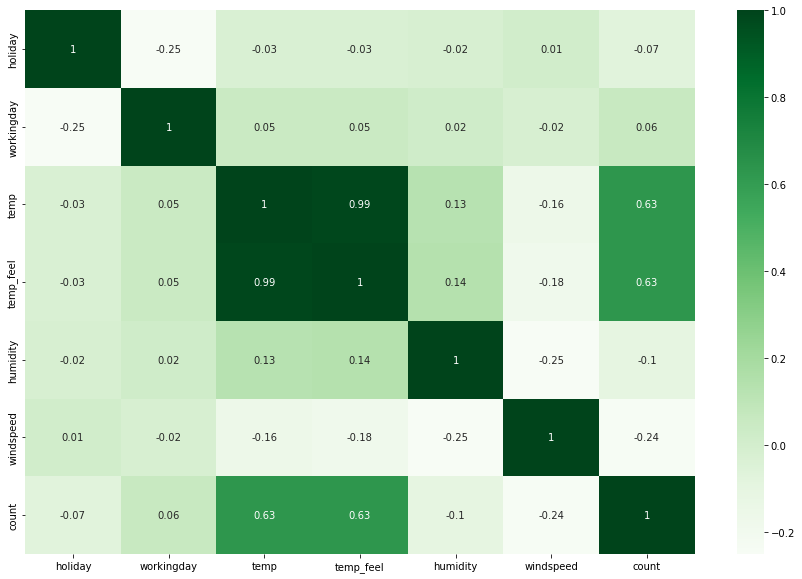

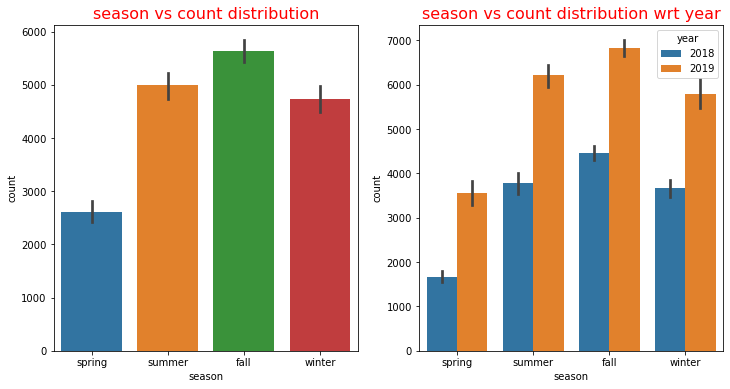

In [131]:
# Based on the above inferences let's try to analyze the data across year to confirm our inferences.

def PrintColVsCountPlot(col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(col,'count',data=df)
    cur_title = col+" vs count distribution"
    plt.title(cur_title,fontsize=16,color='r')
    plt.subplot(1,2,2)
    ax = sns.barplot(col,'count',data=df, hue='year')
    cur_title = col+" vs count distribution wrt year"
    plt.title(cur_title,fontsize=16,color='r')
    plt.show()

PrintColVsCountPlot('season')

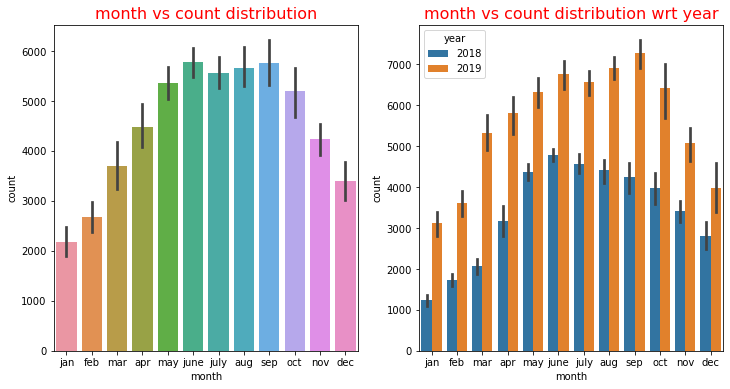

In [132]:
PrintColVsCountPlot('month')

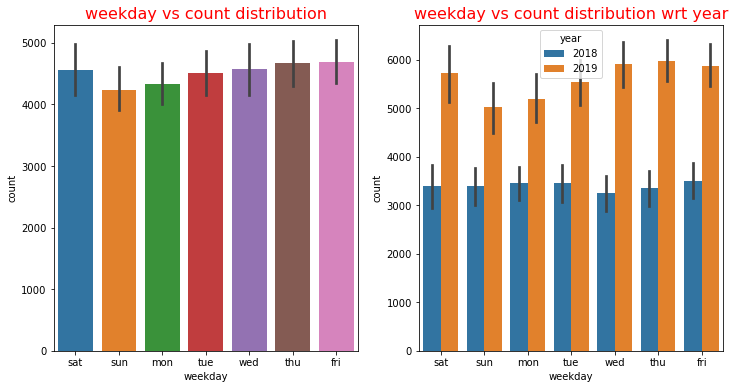

In [133]:
PrintColVsCountPlot('weekday')

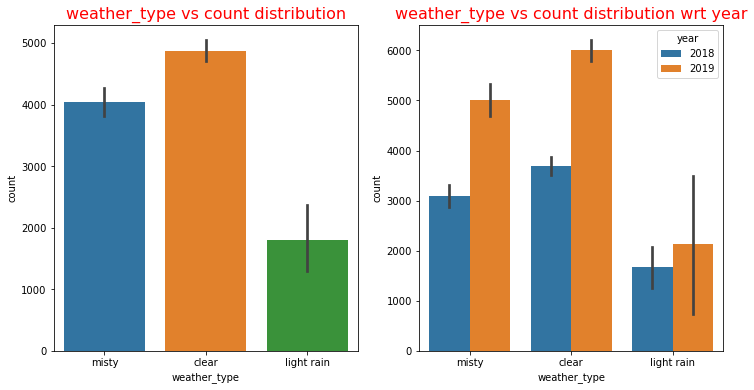

In [134]:
PrintColVsCountPlot('weather_type')

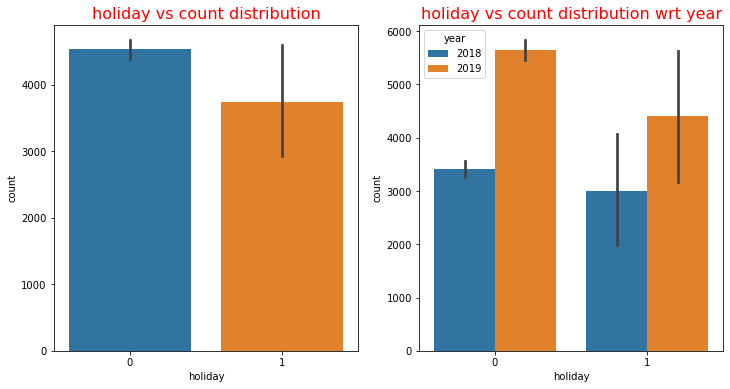

In [135]:
PrintColVsCountPlot('holiday')

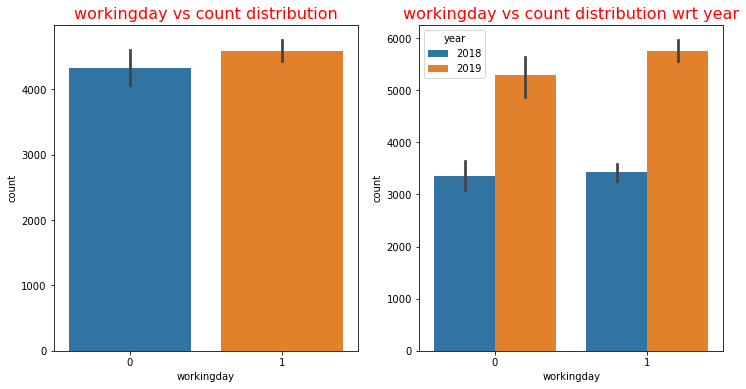

In [136]:
PrintColVsCountPlot('workingday')

In [137]:
#inferences
# fall season had the highest booking
# based on that aug,sep and oct had the highest booking
# not much difference in the distribution of the columns 'workingday' and 'weekday'
# clear weather attracted more booking whereas the bookings dropped substantially on a rainy day.
# the sales were better in the year 2019 than in the year 2018 

<Figure size 1152x1152 with 0 Axes>

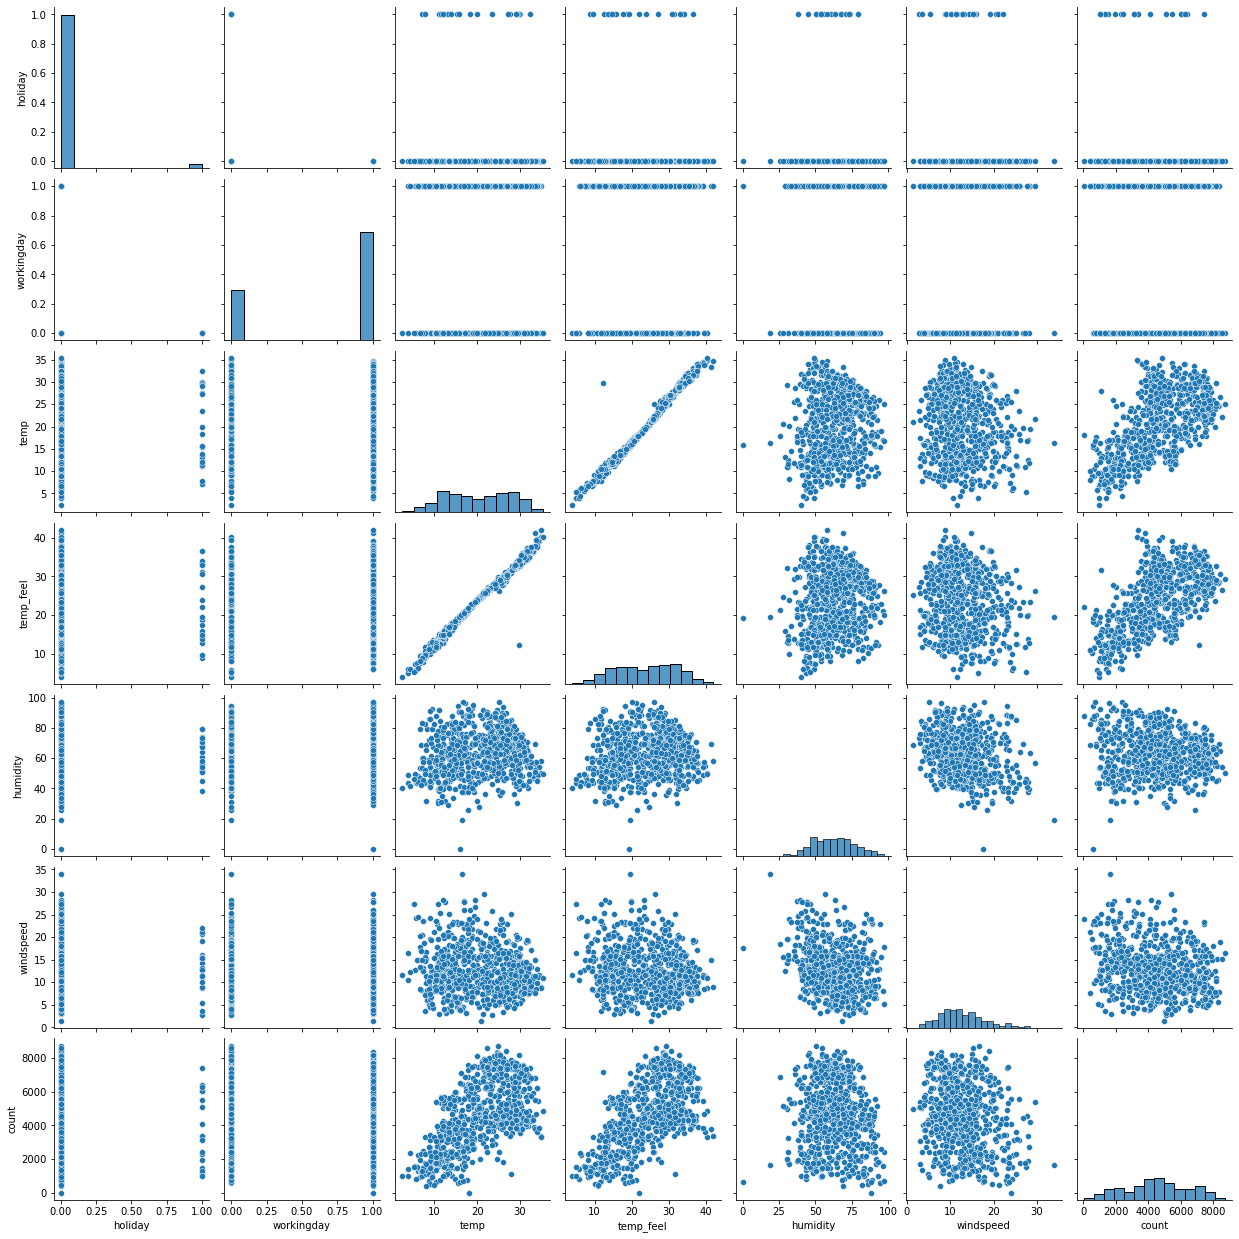

In [140]:
#visualize a pairplot for the given values
plt.figure(figsize=(16,16))
sns.pairplot(data=df)
plt.show()

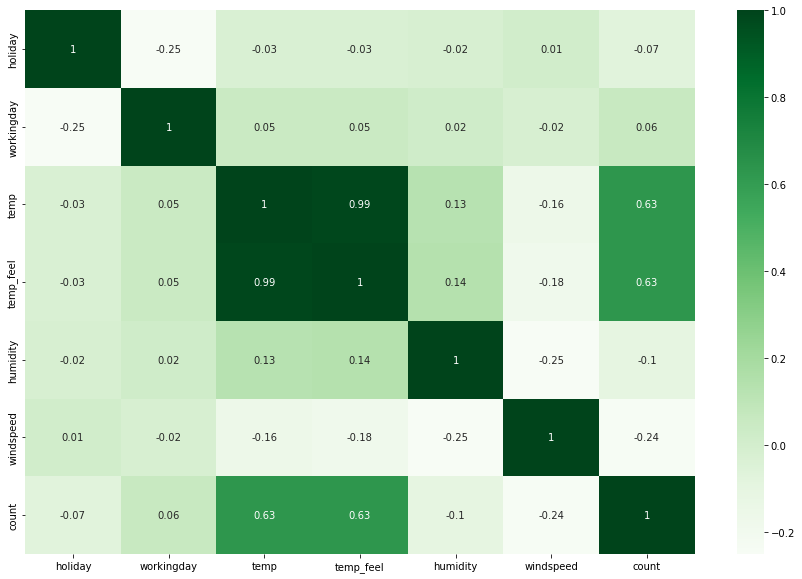

In [141]:
#the above plot confirms that the columns 'temp' and 'temp_feel' are highly correlated and has a very strong linear relationship

#Let's check the heatmap to confirm it.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr().round(2),cmap="Greens",annot=True)
plt.show()

In [142]:
# Dropping the temp_feel column as it is highly correlated to temp
df.drop('temp_feel',axis=1,inplace=True)

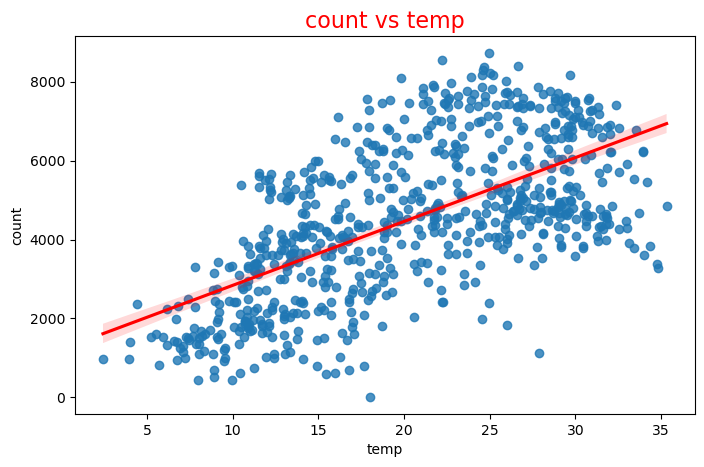

In [144]:
# Checking with regplot for count vs temp
plt.figure(figsize=(8,5),dpi=100)
plt.title("count vs temp",fontsize=16,color='r')
sns.regplot(data=df,y="count",x="temp",line_kws={"color": "red"})
plt.show()

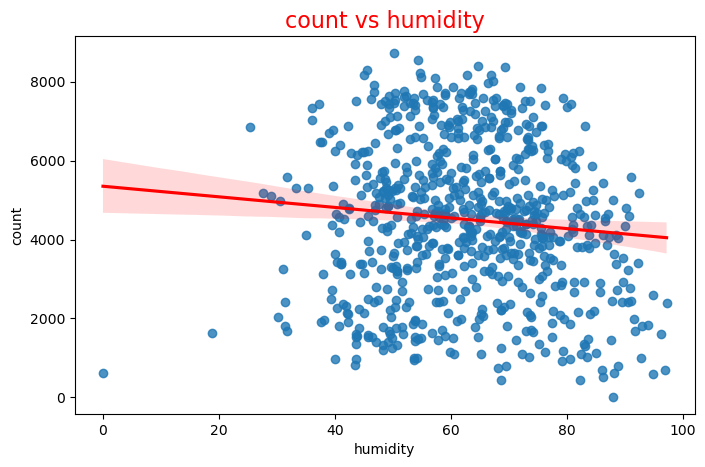

In [145]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("count vs humidity",fontsize=16,color='r')
sns.regplot(data=df,y="count",x="humidity",line_kws={"color": "red"})
plt.show()

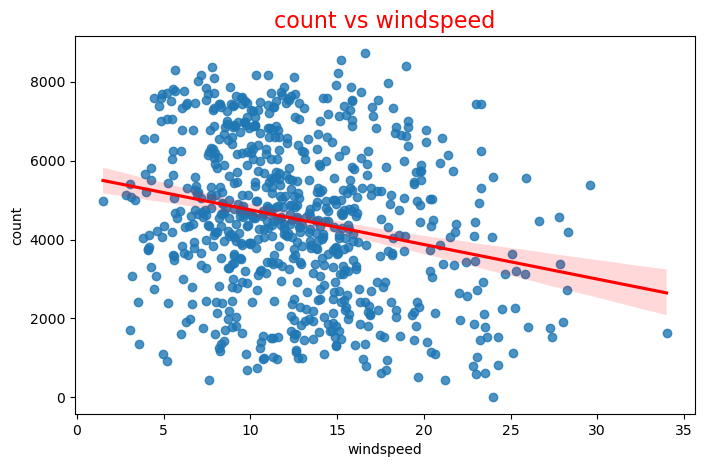

In [146]:
plt.figure(figsize=(8,5),dpi=100)
plt.title("count vs windspeed",fontsize=16,color='r')
sns.regplot(data=df,y="count",x="windspeed",line_kws={"color": "red"})
plt.show()

In [147]:
#the regplots show that there is a strong positive linear relation for the total count wrt temp whereas wrt windspeed and humidity, there is a negative linear relation.

In [148]:
# Dummy variable creation for month, weekday, weathery_type and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weather_type_df=pd.get_dummies(df.weather_type,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [149]:
df.head()

,season,year,month,holiday,weekday,workingday,weather_type,temp,humidity,windspeed,count
0,spring,2018,jan,0,sat,0,misty,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,misty,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


In [150]:
df = pd.concat([df,months_df,weekdays_df,weather_type_df,seasons_df],axis=1)

In [151]:
df.head()

,season,year,month,holiday,weekday,workingday,weather_type,temp,humidity,windspeed,...,sat,sun,thu,tue,wed,light rain,misty,spring,summer,winter
0,spring,2018,jan,0,sat,0,misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,2018,jan,0,sun,0,misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,2018,jan,0,mon,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,jan,0,tue,1,clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,2018,jan,0,wed,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [152]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df.drop(['season','month','weekday','weather_type'], axis = 1, inplace = True)

In [153]:
df.head()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,light rain,misty,spring,summer,winter
0,2018,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2018,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,2018,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#### splitting the data into train - test sets for further analysis

In [155]:
# splitting the dataframe into Train and Test

np.random.seed(0)
train_df, test_df = train_test_split(df, train_size = 0.7, random_state = 50)

In [156]:
#check the shape of training set
train_df.shape

(510, 29)

In [158]:
#check the shape of test dataset
test_df.shape

(220, 29)

In [159]:
#Scale feature
sclr = MinMaxScaler()

# scale all the features except the dummy variable and 1/0 types
ftes = ['temp','humidity','windspeed','count']
train_df[ftes] = sclr.fit_transform(train_df[ftes])

In [160]:
# check the head 
train_df.head()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,light rain,misty,spring,summer,winter
172,2018,0,1,0.865247,0.729068,0.274549,0.515992,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,2018,0,0,0.223565,0.513954,0.243603,0.141049,0,0,0,...,1,0,0,0,0,0,1,1,0,0
204,2018,0,0,0.989306,0.567625,0.267859,0.412333,0,0,0,...,0,1,0,0,0,0,0,0,0,0
182,2018,0,0,0.871664,0.458136,0.150755,0.586401,0,0,0,...,1,0,0,0,0,0,0,0,0,0
708,2019,0,1,0.483446,0.953198,0.313605,0.592269,0,1,0,...,0,0,0,0,0,0,1,0,0,1
